In [95]:
import pandas as pd
from PIL import Image
import random
import ast
import json

In [96]:
datafile = 'prompt_results.csv'
df = pd.read_csv(datafile)
df['bbox'] = df['bbox'].apply(ast.literal_eval)
df.columns

Index(['image_id', 'image_file', 'image_path', 'bbox', 'prompt',
       'generated_text', 'category', 'score'],
      dtype='object')

In [97]:
dataset_dir = 'E:/datasets'
dataset_name = 'DOTA_dataset_512'
coco_dir = f'{dataset_dir}/{dataset_name}'
val_coco = f'{coco_dir}/val_coco.json'

with open(val_coco,'r') as f:
    coco_json = json.load(f)

category_map = {cat['id']:cat['name'] for cat in coco_json['categories']}
categories = list(category_map.keys())
for key, val in category_map.items():
    print(f'{key}:{val}')

1:small-vehicle
2:large-vehicle
3:ship
4:harbor
5:baseball-diamond
6:soccer-ball-field
7:ground-track-field
8:swimming-pool
9:roundabout
10:tennis-court
11:basketball-court
12:plane
13:helicopter
14:bridge
15:storage-tank
16:container-crane


In [98]:
print(df['prompt'].unique())
print(df['category'].unique())

['A picture of']
[ 2  1 15  3  4 12]


In [99]:
picture_of_df = df[df['prompt']=='A picture of']

#picture_of_df=picture_of_df[picture_of_df['category'].isin([5,6,7,8,9,10,11,13,14,16])]

(282, 376, 327, 342)


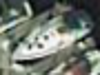

YOLO:ship | BLIP2:a bunch of knives on a black surface
(382, 471, 444, 440)


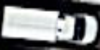

YOLO:large-vehicle | BLIP2:a car with a white roof
(419, 90, 447, 71)


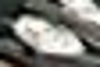

YOLO:ship | BLIP2:a pair of shoes with a black and white design
(123, 491, 168, 449)


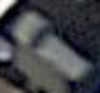

YOLO:small-vehicle | BLIP2:a car with a license plate on it
(453, 411, 465, 403)


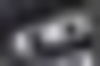

YOLO:small-vehicle | BLIP2:a black and white phone with a white background
(109, 475, 121, 453)


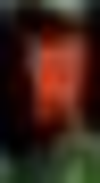

YOLO:small-vehicle | BLIP2:a football field with a large flag
(1, 114, 22, 92)


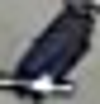

YOLO:small-vehicle | BLIP2:a gun with a black handle
(5, 301, 24, 283)


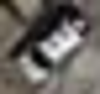

YOLO:small-vehicle | BLIP2:a bottle of wine on a table
(256, 69, 272, 44)


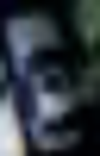

YOLO:small-vehicle | BLIP2:a person holding a phone in the dark
(478, 264, 511, 204)


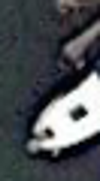

YOLO:ship | BLIP2:a boat in the water
(342, 162, 459, 111)


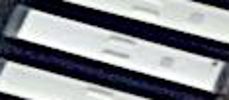

YOLO:large-vehicle | BLIP2:a row of white and black boxes
(192, 169, 233, 146)


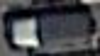

YOLO:small-vehicle | BLIP2:a camera with a lens on it
(425, 511, 430, 505)


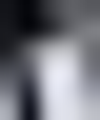

YOLO:small-vehicle | BLIP2:a black and white photo of a person
(29, 391, 36, 380)


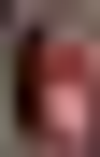

YOLO:small-vehicle | BLIP2:a woman with a red hat on her head
(0, 242, 228, 130)


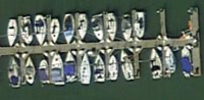

YOLO:harbor | BLIP2:a dock with boats parked on it
(477, 511, 495, 499)


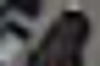

YOLO:small-vehicle | BLIP2:a black and white cat sitting on a bed
(410, 185, 424, 163)


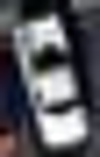

YOLO:small-vehicle | BLIP2:a car with a license plate that says "person"
(0, 177, 7, 166)


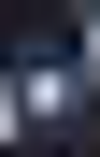

YOLO:small-vehicle | BLIP2:a car with a license plate on it
(87, 94, 109, 81)


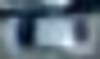

YOLO:small-vehicle | BLIP2:a white and black car with a black roof
(241, 343, 270, 318)


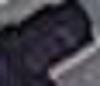

YOLO:small-vehicle | BLIP2:a black and white cat sitting on a bed
(143, 64, 158, 43)


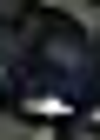

YOLO:small-vehicle | BLIP2:a computer with a keyboard and mouse
(314, 415, 334, 392)


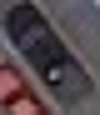

YOLO:small-vehicle | BLIP2:a car with a red and black steering wheel
(388, 198, 396, 193)


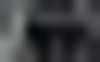

YOLO:small-vehicle | BLIP2:a black and white cat sitting on a gray background
(174, 283, 180, 273)


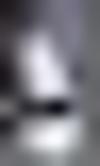

YOLO:small-vehicle | BLIP2:a person holding a phone
(506, 300, 511, 291)


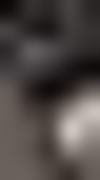

YOLO:small-vehicle | BLIP2:a kitchen with a sink and a stove
(219, 387, 252, 337)


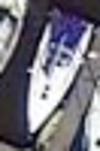

YOLO:ship | BLIP2:boats in a boat yard
(161, 433, 167, 421)


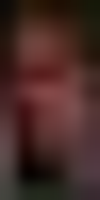

YOLO:small-vehicle | BLIP2:a computer screen with a mouse and keyboard
(238, 117, 247, 110)


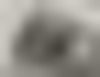

YOLO:small-vehicle | BLIP2:a person holding a small white box
(465, 241, 487, 225)


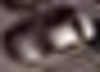

YOLO:small-vehicle | BLIP2:a bottle of wine on a table
(39, 281, 91, 249)


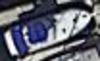

YOLO:ship | BLIP2:a boat in the water with a blue and white flag
(144, 185, 155, 162)


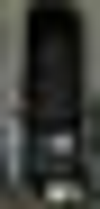

YOLO:small-vehicle | BLIP2:a shelf with a variety of different types of products
(184, 149, 195, 143)


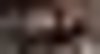

YOLO:small-vehicle | BLIP2:a person sitting on a bench
(131, 111, 164, 74)


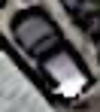

YOLO:small-vehicle | BLIP2:a car with a license plate on it
(54, 439, 148, 393)


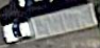

YOLO:large-vehicle | BLIP2:a police car parked on the side of the road
(342, 272, 353, 267)


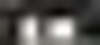

YOLO:small-vehicle | BLIP2:a bathroom with a shower and toilet
(207, 82, 225, 44)


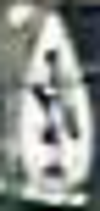

YOLO:ship | BLIP2:a man sitting on a bench with a sign that says "the best place
(358, 170, 382, 127)


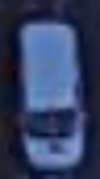

YOLO:small-vehicle | BLIP2:a cell phone sitting on a table
(296, 263, 319, 227)


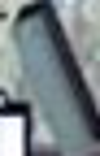

YOLO:large-vehicle | BLIP2:a black and white photo of a person
(258, 428, 267, 423)


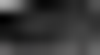

YOLO:small-vehicle | BLIP2:a woman sitting on a couch with a dog
(395, 230, 408, 206)


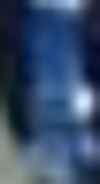

YOLO:small-vehicle | BLIP2:a person wearing a blue jacket


In [100]:
n = 40
random_rows = picture_of_df.sample(n=n)
for index, row in random_rows.iterrows():
    box = row.bbox
    img = Image.open(row.image_path)
    crop_region = (box[0], box[1]+ box[3], box[0]+box[2], box[1])
    print(crop_region)
    region = img.crop((box[0], box[1], box[0]+box[2], box[1]+box[3]))
    region.thumbnail((200,200))
    # Desired minimum size (width, height)
    min_width = 100
    min_height = 100

    # Original dimensions
    orig_width, orig_height = region.size

    # Calculate aspect ratio
    aspect_ratio = orig_width / orig_height

    # Determine which dimension needs to be scaled to meet the minimum size
    if orig_width < min_width:
        # Scale based on the minimum width
        new_width = min_width
        new_height = int(new_width / aspect_ratio)
    elif orig_height < min_height:
        # Scale based on the minimum height
        new_height = min_height
        new_width = int(new_height * aspect_ratio)
    else:
        # No resizing needed if the image is already larger than the minimum in both dimensions
        new_width = orig_width
        new_height = orig_height

    # Resize the image with the new dimensions
    resized_region = region.resize((new_width, new_height))

    # Display the resized region
    display(resized_region)
    #display(region)
    print(f'YOLO:{category_map[row.category]} | BLIP2:{row.generated_text}')